# 数据预处理 

## 生成图片及csv文件 

In [14]:
import idx2numpy

ModuleNotFoundError: No module named 'idx2numpy'

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
import pandas as pd
from PIL import Image

In [9]:
train_imgs_path = 'train-images.idx3-ubyte'
train_labels_path = 'train-labels.idx1-ubyte'
test_imgs_path = 't10k-images.idx3-ubyte'
test_labels_path = 't10k-labels.idx1-ubyte'

In [7]:
imgs = idx2numpy.convert_from_file(train_imgs_path)
labels = idx2numpy.convert_from_file(train_labels_path)

test_imgs = idx2numpy.convert_from_file(test_imgs_path)
test_labels = idx2numpy.convert_from_file(test_labels_path)

NameError: name 'idx2numpy' is not defined

In [8]:
type(labels)
print(test_imgs.shape)

NameError: name 'labels' is not defined

In [9]:
# 1.有一个img-->label的csv
# 2.在当前目录下存在一个包含所有图片的文件夹，images
def convert(imgs, labels, output_folder, output_file):
    df = pd.DataFrame()
    img_name  = []
    img_label = []
    for i in range (imgs.shape[0]):
        array = imgs[i]
        img = Image.fromarray(array)
        img.save('{}/{}.jpg'.format(output_folder, i))
        img_name.append(i)
        img_label.append(labels[i])
    df['name'] = pd.Series(img_name)
    df['label'] = pd.Series(img_label)
    df.to_csv(output_file, header=None, index=False)

In [10]:
convert(imgs,labels,'train_images','train.csv')

NameError: name 'imgs' is not defined

In [11]:
convert(test_imgs, test_labels, 'test_images', 'test.csv')

NameError: name 'test_imgs' is not defined

## 自定义数据集 

In [10]:
import torch.utils.data as data

In [11]:
class my_dataset (data.Dataset):
    def __init__(self, path, name, transform=None):
        self.path = path
        self.name = name
        self.trans = transform
        self.data = pd.read_csv(self.name,header=None)
    def __getitem__ (self,index):
        label = self.data.loc[index].values[1]
        name = self.data.loc[index].values[0]
        img = Image.open(self.path + str(name) + '.jpg')
        if self.trans is not None:
            img = self.trans(img)
        return img, label
    def __len__ (self):
        return self.data.shape[0]

In [12]:
dataset = my_dataset ('train_images/','train.csv')
img, label = dataset.__getitem__(0)
dataset.__len__()

60000

In [13]:
print(label)
img.show()

5


In [14]:
img.mode

'L'

# 定义模型 

In [15]:
import torch.nn as nn
import torch.nn.functional as F

In [16]:
class LeNet(nn.Module):
    def __init__(self, class_num=10):
        super(LeNet, self).__init__()
        # input: 1 x 28 x 28 
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
        # output: 16 x 24 x 24
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        # output: 16 x 12 x 12
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        # output: 32 x 8 x 8
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        # output: 32 x 4 x 4
        self.fc5 = nn.Linear(32*4*4, 128)
        # output: 128
        self.fc6 = nn.Linear(128, 64)
        # output: 64
        self.fc7 = nn.Linear(64, class_num)
        
    # 正向传播过程
    def forward(self, x):
        # 1 x 28 x 28
        # 一般在卷积层和池化层之间使用激活函数
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool2(x)
        
        x = self.conv3(x)
        x = F.relu(x)
        x = self.pool4(x)
        
        x = x.reshape(-1, 32*4*4)
        x = self.fc5(x)
        x = F.relu(x)
        
        x = self.fc6(x)
        x = F.relu(x)
        x = self.fc7(x)
        
        return x

In [17]:
model = LeNet(10)
model

LeNet(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc5): Linear(in_features=512, out_features=128, bias=True)
  (fc6): Linear(in_features=128, out_features=64, bias=True)
  (fc7): Linear(in_features=64, out_features=10, bias=True)
)

# 训练模型

In [18]:
import torchvision.transforms as T

## 创建dataset 

In [19]:
# 创建一个transform
transform = T.Compose([
    T.ToTensor()
])

train_dataset = my_dataset('train_images/', 'train.csv', transform=transform)
test_dataset = my_dataset('test_images/', 'test.csv', transform=transform)

In [20]:
print(train_dataset.__len__())
print(test_dataset.__len__())

60000
10000


In [21]:
# train_dataset.__getitem__(0)
img, label = test_dataset.__getitem__(0)

In [22]:
img.shape

torch.Size([1, 28, 28])

In [23]:
img

tensor([[[0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0118, 0.0039, 0.0000,
          0.0000, 0.0000, 0.0157, 0.0157, 0.0078, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000, 0.0118,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0118, 0.0275,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0039, 0.0000, 0.0000, 0.0235, 0.0431, 0.0196, 0.0118, 0.0235,
          0.0157, 0.0157, 0.0118, 0.0078, 0.0039, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0196, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0118, 0.0118, 0.0078, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

## 创建dataloader 

In [24]:
import torch.utils.data as data

In [25]:
# 创建loader
train_dataloader = data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = data.DataLoader(test_dataset, batch_size=32, shuffle=True)
print(len(train_dataloader))
len(test_dataloader)

1875


313

In [26]:
# 测试数据加载器
imgs, labels = next(iter(train_dataloader))
print(imgs.shape)
print(labels.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [27]:
imgs, labels = next(iter(test_dataloader))
print(imgs.shape)
print(labels.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


## 训练模型

In [28]:
import torch
import torch.optim as optim

In [29]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [30]:
model = LeNet(10).to(device)
model

LeNet(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc5): Linear(in_features=512, out_features=128, bias=True)
  (fc6): Linear(in_features=128, out_features=64, bias=True)
  (fc7): Linear(in_features=64, out_features=10, bias=True)
)

In [31]:
# 首先定义一些参数
epochs = 10
learning_rate = 0.01
# loss function:损失函数
criterion = nn.CrossEntropyLoss()

# optimizer-->优化器-->作用：更新参数
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
batch_num = len(train_dataloader)
test_num = len(test_dataset)

In [32]:
for epoch in range(epochs):
    #训练模型
    model.train()
    for i, data in enumerate(train_dataloader):
        # data-->tuple:(imgs, labels)
        imgs, labels = data
        outputs = model(imgs.to(device))
        loss = criterion(outputs, labels.to(device))
        
        # 清空参数梯度
        optimizer.zero_grad()                                                  
        # 反向传播
        loss.backward()
        # 更新参数
        optimizer.step()
        
        if (i+1) % 125 == 0:
            print('Step: [{} / {}] Loss: {:.4}'.format(i+1, batch_num, loss.item()), end='\r', flush=True)
            
    print('Epoch: [{} / {}]  Loss: {:.4}'.format(epoch+1, epochs, loss.item()))
    
    if (epoch+1)%2 == 0:
        # 验证模型
        model.eval()
        # 正确预测的数目
        acc_num = 0
        with torch.no_grad():
            for i, data in enumerate(test_dataloader):
                t_imgs, t_labels = data
                outputs = model(t_imgs.to(device))
                # outputs ---> shape:[32, 10]
                predicts = torch.max(outputs, dim=1)[1]
                # 统计所有正确预测的数量
                acc_num += torch.eq(predicts, t_labels.to(device)).sum().item()
                print('Test Progress: [{} / {}]'.format(i+1, len(test_dataloader)), end='\r', flush=True)
                
            print('Acc_num: {}, Accuracy: {请:.4}'.format(acc_num, acc_num / test_num))

# 保存网络模型
torch.save(model.state_dict(), 'LeNet.pth')    

/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch: [1 / 10]  Loss: 0.09828828
Epoch: [2 / 10]  Loss: 0.02086086
Acc_num: 9618, Accuracy: 0.9618
Epoch: [3 / 10]  Loss: 0.116516529
Epoch: [4 / 10]  Loss: 0.087787784
Acc_num: 9643, Accuracy: 0.9643
Epoch: [5 / 10]  Loss: 0.21191198
Epoch: [6 / 10]  Loss: 0.01037037
Acc_num: 9748, Accuracy: 0.9748
Epoch: [7 / 10]  Loss: 0.01152152
Epoch: [8 / 10]  Loss: 0.049769765
Acc_num: 9731, Accuracy: 0.9731
Epoch: [9 / 10]  Loss: 0.217217297
Epoch: [10 / 10]  Loss: 0.03818182
Acc_num: 9676, Accuracy: 0.9676


In [33]:
a = torch.tensor([5])
print(type(a))
print(type(a.item()))

<class 'torch.Tensor'>
<class 'int'>


In [34]:
for i in range (100):
    print(i, end='\r', flush=True)

In [35]:
arr = torch.tensor([[1, 2, 3],
                   [4, 5, 6]])

In [36]:
out = torch.max(arr)
out

tensor(6)

In [37]:
# dim = 0 ----> 1.返回每一列的最大值  2.返回最大值的行标
out = torch.max(arr, dim=0)
out

torch.return_types.max(
values=tensor([4, 5, 6]),
indices=tensor([1, 1, 1]))

In [38]:
# dim = 1----> 1.返回每一行的最大值  2.返回最大值的列标
out = torch.max(arr, dim=1)
out

torch.return_types.max(
values=tensor([3, 6]),
indices=tensor([2, 2]))

In [39]:
out = torch.max(arr, dim=1)[1]
out

tensor([2, 2])

In [40]:
# torch.eq()
arr1 = torch.tensor([1, 2, 3, 4])
arr2 = torch.tensor([1, 5, 3, 4])

acc = torch.eq(arr1, arr2)
acc

tensor([ True, False,  True,  True])

In [41]:
print(acc.sum())
print(type(acc.sum()))
print(type(acc.sum().item()))

tensor(3)
<class 'torch.Tensor'>
<class 'int'>


# 测试模型

In [42]:
import cv2 as cv

In [43]:
model

LeNet(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc5): Linear(in_features=512, out_features=128, bias=True)
  (fc6): Linear(in_features=128, out_features=64, bias=True)
  (fc7): Linear(in_features=64, out_features=10, bias=True)
)

RGB


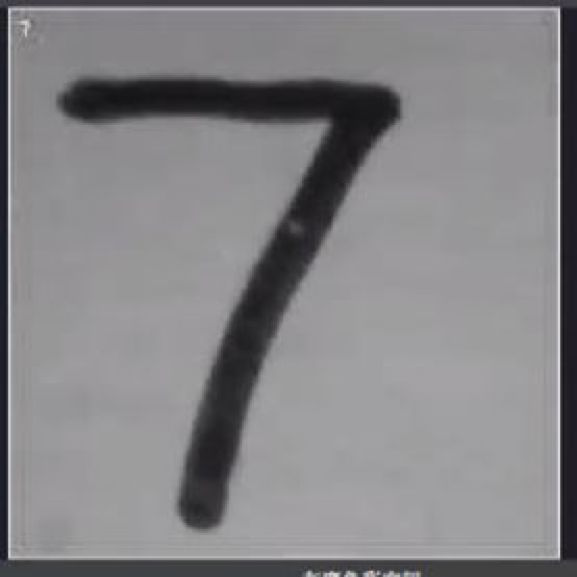

In [44]:
# 加载图像
img = Image.open('test.jpg')
print(img.mode)
img

In [45]:
# 更改通道
img = img.convert('L')
print(img.mode)
print(img.size)
print(type(img))

L
(577, 577)
<class 'PIL.Image.Image'>


In [46]:
img = img.resize((28, 28), Image.ANTIALIAS)
print(img.size)
img

(28, 28)


In [47]:
img = np.array(img)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
retval, res = cv.threshold(gray, 127, 255, cv.THRESH_BINARY)
res = Image.fromarray(res)
res

error: OpenCV(4.5.3) /private/var/folders/lk/d38n3d_93r196smzprgj2z7c0000gn/T/pip-install-17m3g67i/opencv-python_f0a11c6790fd49df942a122cb007b331/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<1, -1, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDcn = cv::impl::(anonymous namespace)::Set<1, -1, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::NONE]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [ ]:
tmp = np.array(res)
tmp

In [ ]:
for i in range(28):
    for j in range(28):
        if tmp[i][j] == 255:
            tmp[i][j]=0
        else:
            tmp[i][j]=255


In [ ]:
tmp = ~tmp

In [ ]:
img = Image.fromarray(tmp)
img

In [ ]:
print(type(img))
img = transform(img)
print(type(img))

In [ ]:
# input : [batch_size, channel, width, height]
print(img.shape)
new_img = img.unsqueeze(0)
print(new_img.shape)

In [ ]:
model.eval()
with torch.no_grad():
    out = model(new_img.to(device))
    pre = torch.max(out, dim=1)[1]
    print(pre)

In [ ]:
# 加载.pth模型文件
net = LeNet(10)
net.load_state_dict(torch.load('LeNet.pth'))
net

In [ ]:
with torch.no_grad():
    out = net(new_img)
    pre = torch.max(out, dim=1)[1]
    print(pre[0].item())